In [1]:
import pandas as pd
#Read Data
raw_data=pd.read_csv('/home/sayan/royal_carr_model/data.csv')

In [2]:
#Columns/Dimension of Data
raw_data.columns

Index([u'date', u'TotalConsmp', u'R1', u'H_1', u'R2', u'H_2', u'R3', u'H_3',
       u'R4', u'H_4', u'R5', u'H_5', u'R6', u'H_6', u'R7', u'H_7', u'R8',
       u'H_8', u'R9', u'H_9', u'TempOutSide', u'Press_mm_hg', u'H_OutSide',
       u'Windspeed', u'Visibility'],
      dtype='object')

In [3]:
#Observation Count
len(raw_data)

19735

In [4]:
#Sample Data
raw_data[0:10]
raw_data.info()
raw_data.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 25 columns):
date           19735 non-null object
TotalConsmp    19735 non-null int64
R1             19735 non-null float64
H_1            19735 non-null float64
R2             19735 non-null float64
H_2            19735 non-null float64
R3             19735 non-null float64
H_3            19735 non-null float64
R4             19735 non-null float64
H_4            19735 non-null float64
R5             19735 non-null float64
H_5            19735 non-null float64
R6             19735 non-null float64
H_6            19735 non-null float64
R7             19735 non-null float64
H_7            19735 non-null float64
R8             19735 non-null float64
H_8            19735 non-null float64
R9             19735 non-null float64
H_9            19735 non-null float64
TempOutSide    19735 non-null float64
Press_mm_hg    19735 non-null float64
H_OutSide      19735 non-null float64
Windspeed      19735

date           0
TotalConsmp    0
R1             0
H_1            0
R2             0
H_2            0
R3             0
H_3            0
R4             0
H_4            0
R5             0
H_5            0
R6             0
H_6            0
R7             0
H_7            0
R8             0
H_8            0
R9             0
H_9            0
TempOutSide    0
Press_mm_hg    0
H_OutSide      0
Windspeed      0
Visibility     0
dtype: int64

In [5]:
#Starting Time stamp
raw_data['date'][0]

'1/11/2016 17:00'

In [6]:
#End Time stamp
raw_data['date'][len(raw_data)-1]

'5/27/2016 18:00'

In [7]:
#Interval of timestamp
#from datetime import datetime
raw_data['dt_tm']=pd.to_datetime(raw_data['date'],format="%m/%d/%Y %H:%M")
#raw_data['dt_tm'] = raw_data['date'].apply(lambda x: datetime.strptime(x,"%m/%d/%Y %H:%M"))
raw_data['dt_tm'].diff(periods=1).mean()

Timedelta('0 days 00:10:00')

In [8]:
#Range of Time stamp
raw_data['dt_tm'][len(raw_data)-1]-raw_data['dt_tm'][0]

Timedelta('137 days 01:00:00')

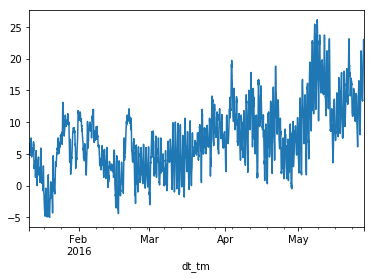

In [9]:
#Plot External Temperature wrt. date time
%matplotlib inline
raw_data.set_index('dt_tm').TempOutSide.plot()

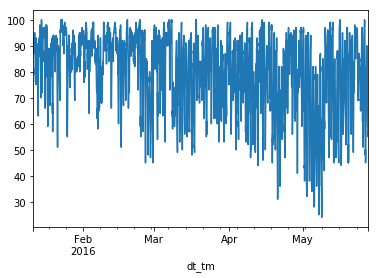

In [10]:
#Plot External Humidity wrt. date time
%matplotlib inline
raw_data.set_index('dt_tm').H_OutSide.plot()

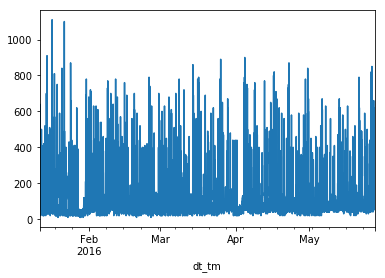

In [11]:
#Plot Power Consumption wrt. date time
%matplotlib inline
raw_data.set_index('dt_tm').TotalConsmp.plot()

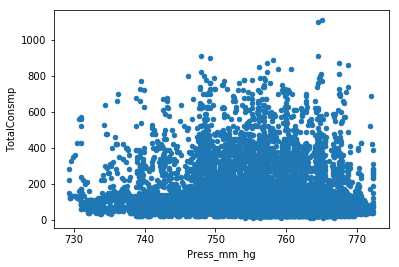

In [12]:
#Plot Power Consumption wrt. Pressure Temperature
%matplotlib inline
raw_data.plot('Press_mm_hg','TotalConsmp','scatter')

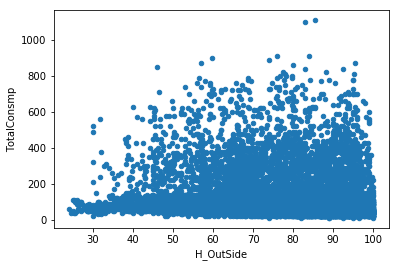

In [13]:
#Plot Power Consumption wrt. External Humidity 
%matplotlib inline
raw_data.plot('H_OutSide','TotalConsmp','scatter')

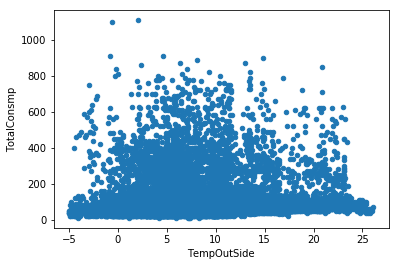

In [14]:
#Plot Power Consumption wrt. External Temperature
%matplotlib inline
raw_data.plot('TempOutSide','TotalConsmp','scatter')

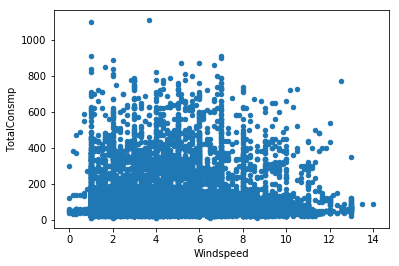

In [15]:
#Plot Power Consumption wrt. Windspeed
%matplotlib inline
raw_data.plot('Windspeed','TotalConsmp','scatter')

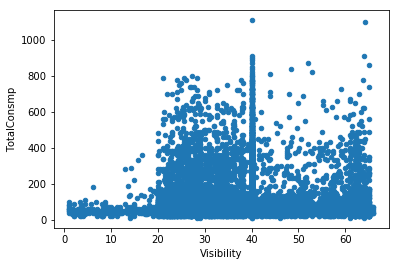

In [16]:
#Plot Power Consumption wrt. Visibility
%matplotlib inline
raw_data.plot('Visibility','TotalConsmp','scatter')

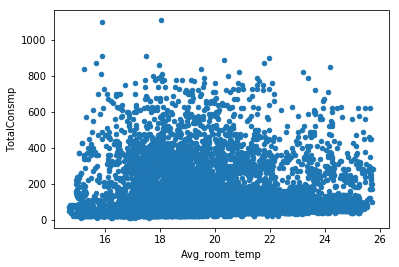

In [17]:
#Plot Power Consumption wrt. Internal Temperature.
raw_data['Avg_room_temp']=raw_data[['R1','R2','R3','R4','R5','R6','R7','R8','R9']].mean(axis=1)
raw_data['Avg_room_humid']=raw_data[['H_1','H_2','H_3','H_4','H_5','H_6','H_7','H_8','H_9']].mean(axis=1)
raw_data['Max_room_temp']=raw_data[['R1','R2','R3','R4','R5','R6','R7','R8','R9']].max(axis=1)
raw_data['Max_room_humid']=raw_data[['H_1','H_2','H_3','H_4','H_5','H_6','H_7','H_8','H_9']].max(axis=1)
%matplotlib inline
raw_data.plot('Avg_room_temp','TotalConsmp','scatter')

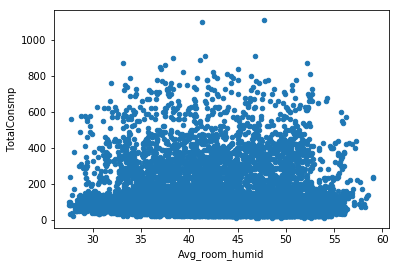

In [18]:
#Plot Power Consumption wrt. Internal Humidity
%matplotlib inline
raw_data.plot('Avg_room_humid','TotalConsmp','scatter')

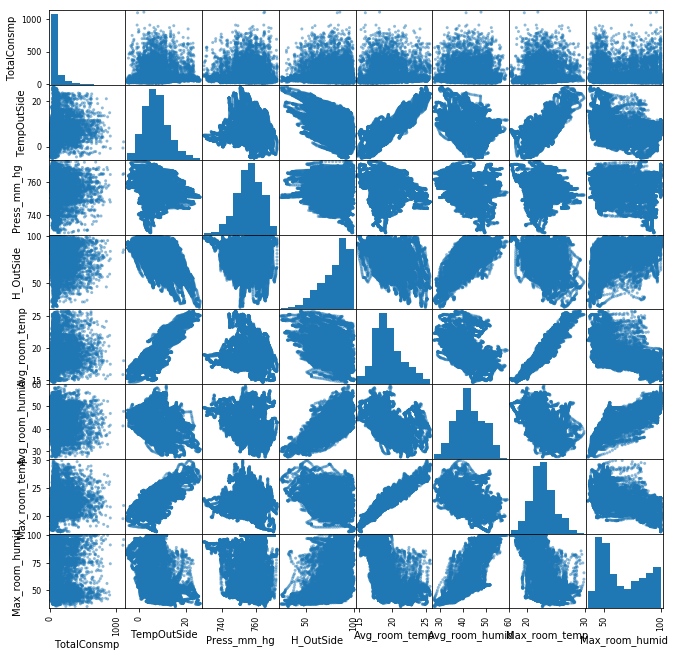

In [19]:
%matplotlib inline
pd.plotting.scatter_matrix(raw_data[['TotalConsmp','TempOutSide','Press_mm_hg','H_OutSide','Avg_room_temp','Avg_room_humid','Max_room_temp','Max_room_humid']], figsize=(11, 11));

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
train,test = train_test_split(raw_data[['TotalConsmp','Windspeed','TempOutSide','Press_mm_hg','H_OutSide','Avg_room_temp','Avg_room_humid','Max_room_temp','Max_room_humid']], test_size=0.33, random_state=42)
print len(train)
print len(test)

13222
6513


In [21]:
lm = linear_model.LinearRegression('l2','liblinear','ovr')
model = lm.fit(train[['Windspeed','TempOutSide','Press_mm_hg','H_OutSide','Avg_room_temp','Avg_room_humid','Max_room_temp','Max_room_humid']],train[['TotalConsmp']])
print model.score(test[['Windspeed','TempOutSide','Press_mm_hg','H_OutSide','Avg_room_temp','Avg_room_humid','Max_room_temp','Max_room_humid']], test[['TotalConsmp']])
print model.coef_ 

0.0434862628213
[[  2.33592562   1.27946071  -0.36845216  -1.22553569 -15.96918932
   -0.58166168  18.53105934   0.72259091]]


In [22]:
import statsmodels.api as sm
olsmod = sm.OLS(test[['TotalConsmp']], test[['Windspeed','TempOutSide','Press_mm_hg','H_OutSide','Avg_room_temp','Avg_room_humid','Max_room_temp','Max_room_humid']])
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalConsmp   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     848.7
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        19:43:29   Log-Likelihood:                -39360.
No. Observations:                6513   AIC:                         7.874e+04
Df Residuals:                    6505   BIC:                         7.879e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Windspeed          2.7640      0.600      4.

/home/sayan/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:
raw_data1=raw_data[['TotalConsmp','Windspeed','TempOutSide','Press_mm_hg','H_OutSide','R1','H_1','R2','H_2','R3','H_3',u'R4','H_4','R5','H_5','R6','H_6','R7','H_7','R8','H_8','R9','H_9']]
train1,test1 = train_test_split(raw_data1)
train1_x=train1[['Windspeed','TempOutSide','Press_mm_hg','H_OutSide','R1','H_1','R2','H_2','R3','H_3',u'R4','H_4','R5','H_5','R6','H_6','R7','H_7','R8','H_8','R9','H_9']]
train1_y=train1[['TotalConsmp']]
test1_x=test1[['Windspeed','TempOutSide','Press_mm_hg','H_OutSide','R1','H_1','R2','H_2','R3','H_3',u'R4','H_4','R5','H_5','R6','H_6','R7','H_7','R8','H_8','R9','H_9']]
test1_y=test1[['TotalConsmp']]
lm1= linear_model.LinearRegression('l2','liblinear','ovr')
model = lm1.fit(train1_x,train1_y)
print model.score(test1_x,test1_y)

0.147528127996


In [24]:
olsmod1 = sm.OLS(raw_data1[['TotalConsmp']],raw_data1[['Windspeed','TempOutSide','Press_mm_hg','H_OutSide','R1','H_1','R2','H_2','R3','H_3',u'R4','H_4','R5','H_5','R6','H_6','R7','H_7','R8','H_8','R9','H_9']])
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalConsmp   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     1163.
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        19:43:29   Log-Likelihood:            -1.1809e+05
No. Observations:               19735   AIC:                         2.362e+05
Df Residuals:                   19713   BIC:                         2.364e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Windspeed       2.4698      0.330      7.475      

In [37]:
raw_data2=raw_data1.rolling(1008).mean()
raw_data2=raw_data2.dropna(axis=0, how='any')
train1,test1 = train_test_split(raw_data2)
train1_x=train1[['Windspeed','TempOutSide','Press_mm_hg','H_OutSide','R1','H_1','R2','H_2','R3','H_3',u'R4','H_4','R5','H_5','R6','H_6','R7','H_7','R8','H_8','R9','H_9']]
train1_y=train1[['TotalConsmp']]
test1_x=test1[['Windspeed','TempOutSide','Press_mm_hg','H_OutSide','R1','H_1','R2','H_2','R3','H_3',u'R4','H_4','R5','H_5','R6','H_6','R7','H_7','R8','H_8','R9','H_9']]
test1_y=test1[['TotalConsmp']]
lm1= linear_model.LinearRegression('l2','liblinear','ovr')
model = lm1.fit(train1_x,train1_y)
print model.score(test1_x,test1_y)
print model.coef_

0.751462340791
[[  1.8603237   -1.6511369    0.4074431    1.32896163  -0.9478435
    1.34563311  20.74768757   6.76903485   4.86882527   1.81848312
   -3.91531311  -4.6064433   -0.97544762   0.72402953  -1.3870311
   -0.44951898   5.30993348  -0.87275597   7.07584963  -2.87860059
  -23.03687249  -0.06268821]]


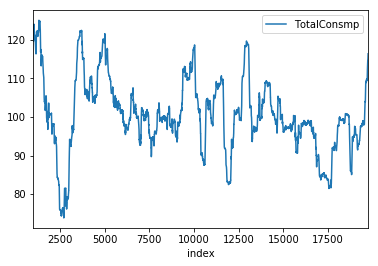

In [43]:
raw_data2.reset_index().plot(x='index', y='TotalConsmp')

In [38]:
olsmod2 = sm.OLS(raw_data2[['TotalConsmp']],raw_data2[['Windspeed','TempOutSide','Press_mm_hg','H_OutSide','R1','H_1','R2','H_2','R3','H_3',u'R4','H_4','R5','H_5','R6','H_6','R7','H_7','R8','H_8','R9','H_9']])
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalConsmp   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.385e+05
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        20:06:58   Log-Likelihood:                -56916.
No. Observations:               18728   AIC:                         1.139e+05
Df Residuals:                   18706   BIC:                         1.140e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Windspeed      -0.1295      0.100     -1.295      

In [27]:
#Commented out the forced quadratic transformation
#raw_data['TempOutSide']=raw_data['TempOutSide']*raw_data['TempOutSide']

In [28]:
raw_data[['TotalConsmp','TempOutSide','Press_mm_hg','H_OutSide','Avg_room_temp','Avg_room_humid','Max_room_temp','Max_room_humid']].corr()

,TotalConsmp,TempOutSide,Press_mm_hg,H_OutSide,Avg_room_temp,Avg_room_humid,Max_room_temp,Max_room_humid
TotalConsmp,1.000000,0.091733,-0.035069,-0.144363,0.070423,-0.048051,0.083896,-0.013765
TempOutSide,0.091733,1.000000,-0.143258,-0.574186,0.849343,-0.266085,0.681872,-0.441422
Press_mm_hg,-0.035069,-0.143258,1.000000,-0.092017,-0.159959,-0.195538,-0.149760,-0.043985
H_OutSide,-0.144363,-0.574186,-0.092017,1.000000,-0.471033,0.673724,-0.353875,0.518015
Avg_room_temp,0.070423,0.849343,-0.159959,-0.471033,1.000000,-0.417091,0.929113,-0.614000
Avg_room_humid,-0.048051,-0.266085,-0.195538,0.673724,-0.417091,1.000000,-0.400948,0.832582
Max_room_temp,0.083896,0.681872,-0.149760,-0.353875,0.929113,-0.400948,1.000000,-0.593482
Max_room_humid,-0.013765,-0.441422,-0.043985,0.518015,-0.614000,0.832582,-0.593482,1.000000


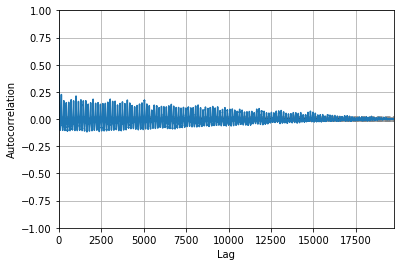

In [29]:
from pandas.tools.plotting import autocorrelation_plot
pd.plotting.autocorrelation_plot(raw_data[['TotalConsmp']])

In [78]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np

In [31]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [132]:
#values = raw_data[['TotalConsmp','TempOutSide','Press_mm_hg','H_OutSide','Avg_room_temp','Avg_room_humid','Max_room_temp','Max_room_humid']].values
values = raw_data[['TotalConsmp','Windspeed','TempOutSide','Press_mm_hg','H_OutSide','R1','H_1','R2','H_2','R3','H_3',u'R4','H_4','R5','H_5','R6','H_6','R7','H_7','R8','H_8','R9','H_9']].values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 2)

In [33]:
#Predict with 1 variable
values = reframed.values
X = values[:,:1]
Y = values[:,1]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)
print(X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape)

((13813, 1), (13813,), (5920, 1), (5920,))


In [133]:
#Predict with all shifted variables
values = reframed.values
#X = values[:,:1]
#Y = values[:,:-1]
X = values[:,23:24]
Y = np.delete(values, [23], axis=1)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)
# reshape input to be 3D [samples, timesteps, features]
X_Train = X_Train.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_Test = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))
print(X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape)

((13813, 1, 1), (13813, 68), (5920, 1, 1), (5920, 68))


In [134]:
X_Train = X_Train.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_Test = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))
# network architecture
model = Sequential()
model.add(LSTM(50, input_shape=(X_Train.shape[1], X_Train.shape[2])))
#Dense(n) Based on the dimension of the Train/Test X
model.add(Dense(68))
model.compile(loss='mae', optimizer='adam')
# fit
history = model.fit(X_Train, Y_Train, epochs=100, batch_size=10, validation_data=(X_Test, Y_Test), verbose=2, shuffle=False)

Train on 13813 samples, validate on 5920 samples
Epoch 1/100
4s - loss: 0.1537 - val_loss: 0.1384
Epoch 2/100
3s - loss: 0.1380 - val_loss: 0.1378
Epoch 3/100
3s - loss: 0.1376 - val_loss: 0.1377
Epoch 4/100
3s - loss: 0.1376 - val_loss: 0.1377
Epoch 5/100
3s - loss: 0.1375 - val_loss: 0.1377
Epoch 6/100
3s - loss: 0.1375 - val_loss: 0.1376
Epoch 7/100
3s - loss: 0.1375 - val_loss: 0.1376
Epoch 8/100
3s - loss: 0.1374 - val_loss: 0.1375
Epoch 9/100
3s - loss: 0.1374 - val_loss: 0.1375
Epoch 10/100
3s - loss: 0.1373 - val_loss: 0.1374
Epoch 11/100
3s - loss: 0.1372 - val_loss: 0.1373
Epoch 12/100
3s - loss: 0.1371 - val_loss: 0.1371
Epoch 13/100
3s - loss: 0.1369 - val_loss: 0.1370
Epoch 14/100
3s - loss: 0.1368 - val_loss: 0.1369
Epoch 15/100
3s - loss: 0.1367 - val_loss: 0.1367
Epoch 16/100
3s - loss: 0.1365 - val_loss: 0.1366
Epoch 17/100
3s - loss: 0.1364 - val_loss: 0.1365
Epoch 18/100
3s - loss: 0.1363 - val_loss: 0.1364
Epoch 19/100
3s - loss: 0.1363 - val_loss: 0.1364
Epoch 20/1

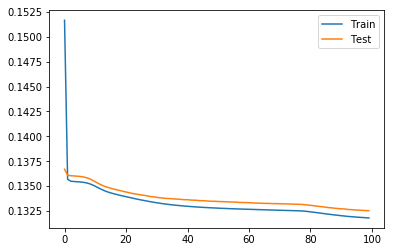

In [36]:
# plot history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='Train')
pyplot.plot(history.history['val_loss'], label='Test')
pyplot.legend()
pyplot.show()